In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV ,KFold
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from sklearn.model_selection import cross_val_score

In [19]:
df = pd.read_csv('Data/colon-dataset-processed.csv')
df

Class  Age  p16540_C/C  p16540_G/C  p16540_G/G  p16580_C/C  \
0      healthy   49       False        True       False        True   
1      healthy   49       False        True       False        True   
2      healthy   49       False        True       False        True   
3      healthy   36       False        True       False        True   
4      healthy   49        True       False       False       False   
..         ...  ...         ...         ...         ...         ...   
110  diagnosed   81       False        True       False        True   
111  diagnosed   73        True       False       False        True   
112  diagnosed   56        True       False       False        True   
113  diagnosed   74       False        True       False       False   
114  diagnosed   37       False        True       False       False   

     p16580_C/T  p16580_T/T  mdm2_G/G  mdm2_G/T  mdm2_T/T  GAL3_A/A  GAL3_C/A  \
0         False       False      True     False     False     False      True   
1         False       False      True     False     False      True     False   
2         False       False     False      True     False     False      True   
3         False       False     False     False      True     False      True   
4          True       False     False     False      True     False     False   
..          ...         ...       ...       ...       ...       ...       ...   
110       False       False     False     False      True     False     False   
111       False       False     False     False      True     False     False   
112       False       False     False      True     False     False     False   
113        True       False      True     False     False     False     False   
114        True       False     False     False      True     False     False   

     GAL3_C/C  TIM1_C/C  TIM1_G/C  TIM1_G/G  
0       False     False      True     False  
1       False     False      True     False  
2       False      True     False     False  
3       False      True     False     False  
4        True     False      True     False  
..        ...       ...       ...       ...  
110      True     False     False      True  
111      True     False     False      True  
112      True     False      True     False  
113      True     False     False      True  
114      True     False      True     False  

[115 rows x 17 columns]

In [39]:
data=df.drop(['Class'],axis=1)
target=df['Class']
print('Original dataset distribution %s' % Counter(target))
adaboost = AdaBoostClassifier()
random_state=42


Original dataset distribution Counter({'diagnosed': 65, 'healthy': 50})


# Oreginal data 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3,random_state=random_state)
adaboost.fit(X_train, y_train)



y_pred_Org= adaboost.predict(X_test)
print("Accuracy: %.2f%%" % (adaboost.score(X_test, y_test) * 100.0))

Accuracy: 86.96%


In [41]:
# Perform cross-validation
n_splits = 55
cv_scores = cross_val_score(adaboost, data, target, cv=n_splits, scoring='accuracy')

# Calculate the average of the cross-validation scores
average_accuracy = np.mean(cv_scores)
print(f"Average Accuracy over {n_splits}-fold cross-validation: {average_accuracy*100}")

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 50 members, which is less than n_splits=55.
  warnings.warn(


Average Accuracy over 55-fold cross-validation: 84.24242424242424


              precision    recall  f1-score   support

   diagnosed       0.85      0.92      0.88        12
     healthy       0.90      0.82      0.86        11

    accuracy                           0.87        23
   macro avg       0.87      0.87      0.87        23
weighted avg       0.87      0.87      0.87        23



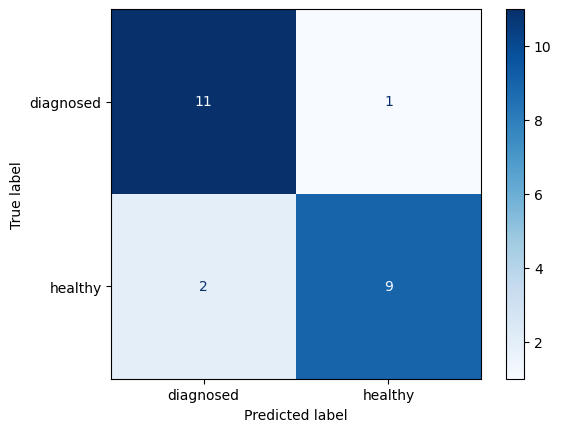

In [42]:

print(classification_report(y_test, y_pred_Org))
cm=confusion_matrix(y_test, y_pred_Org)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [43]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0]
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(adaboost, param_grid, cv=KFold(n_splits=4, random_state=0, shuffle=True), scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)



Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.2s
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.2s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.3s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.3s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.3s
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.1s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.3s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   0.5s
[CV] END ..............learning_rate=0.001, n_es

GridSearchCV(cv=KFold(n_splits=4, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=2)

In [44]:
# Print the best parameters and their corresponding accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy: %.2f%% " % (grid_search.best_score_*100.0))

# Evaluate on the test set
y_pred_OrgGr = grid_search.predict(X_test)
print("Accuracy with Grid search: %.2f%%" % (grid_search.score(X_test, y_test) * 100.0))


Best parameters found: {'learning_rate': 0.001, 'n_estimators': 50}
Best cross-validation accuracy: 88.04% 
Accuracy with Grid search: 78.26%


In [45]:
# Perform cross-validation
n_splits = 55
cv_scores = cross_val_score(grid_search, data, target, cv=n_splits, scoring='accuracy')

# Calculate the average of the cross-validation scores
average_accuracy = np.mean(cv_scores)
print(f"Average Accuracy over {n_splits}-fold cross-validation: {average_accuracy*100}")

Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.1s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.1s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.2s


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 50 members, which is less than n_splits=55.
  warnings.warn(


[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.2s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.2s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   0.3s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   0.3s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   0.5s
[CV] END ..............learning_rate=0.001, n_estimators=200; total time=   0.5s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ..............learning_rate=0.001, n_estimators=200; total time=   0.5s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ..............learn

KeyboardInterrupt: 

              precision    recall  f1-score   support

   diagnosed       0.79      0.83      0.81        18
     healthy       0.81      0.76      0.79        17

    accuracy                           0.80        35
   macro avg       0.80      0.80      0.80        35
weighted avg       0.80      0.80      0.80        35



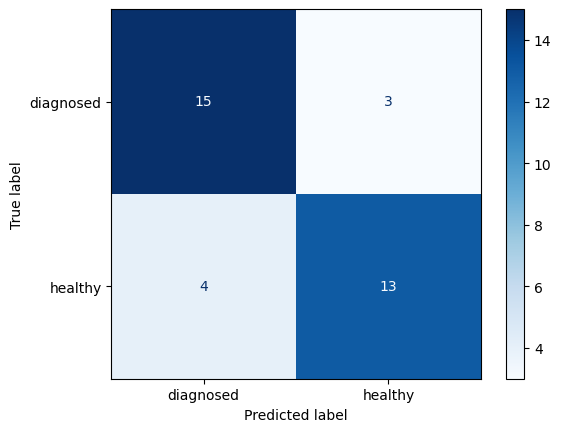

In [ ]:

print(classification_report(y_test, y_pred_OrgGr))
cm=confusion_matrix(y_test, y_pred_OrgGr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3,random_state=random_state)

# Define a new pipeline with AdaBoostClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Preprocess data using StandardScaler
    ('pca', PCA(n_components=2)),   # Step 2: Reduce dimensionality using PCA
    ('ada', AdaBoostClassifier(random_state=42))  # Step 3: Train an AdaBoostClassifier
])

# Define a new parameter grid to search for best parameters for all the pipeline steps
# This includes AdaBoost-specific parameters like n_estimators and learning_rate
# and base_estimator parameters if you're tuning the decision tree used within AdaBoost
param_grid = {
    'pca__n_components': [2, 3, 4],
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 1],
    'ada__base_estimator': [DecisionTreeClassifier(max_depth=1), 
                            DecisionTreeClassifier(max_depth=2)]
}

# Use GridSearchCV to search for the best parameters over the param_grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Evaluate the best pipeline on the test data
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

In [49]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.6857142857142857


In [50]:
# Perform cross-validation
n_splits = 10
cv_scores = cross_val_score(grid_search, data, target, cv=n_splits, scoring='accuracy')

# Calculate the average of the cross-validation scores
average_accuracy = np.mean(cv_scores)


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

In [51]:
print(f"Average Accuracy over {n_splits}-fold cross-validation: {average_accuracy*100}")

Average Accuracy over 10-fold cross-validation: 69.39393939393939


# Oversampled

In [28]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(data, target)
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.3,random_state=random_state)
print('Original dataset distribution %s' % Counter(y_train_res))
adaboost_smote = AdaBoostClassifier()
adaboost_smote.fit(X_train, y_train)
y_pred_SMOTE= adaboost_smote.predict(X_test)
print("Accuracy of SMOTE data: %.2f%%" % (adaboost_smote.score(X_test, y_test) * 100.0))
# 82.05%

Original dataset distribution Counter({'healthy': 65, 'diagnosed': 65})
Accuracy of SMOTE data: 82.05%


In [29]:
# Perform cross-validation
n_splits = 55
cv_scores = cross_val_score(adaboost_smote, X_train_res, y_train_res, cv=n_splits, scoring='accuracy')

# Calculate the average of the cross-validation scores
average_accuracy = np.mean(cv_scores)
print(f"Average Accuracy over {n_splits}-fold cross-validation: {average_accuracy*100}")

Average Accuracy over 55-fold cross-validation: 85.45454545454545


              precision    recall  f1-score   support

   diagnosed       0.88      0.74      0.80        19
     healthy       0.78      0.90      0.84        20

    accuracy                           0.82        39
   macro avg       0.83      0.82      0.82        39
weighted avg       0.83      0.82      0.82        39



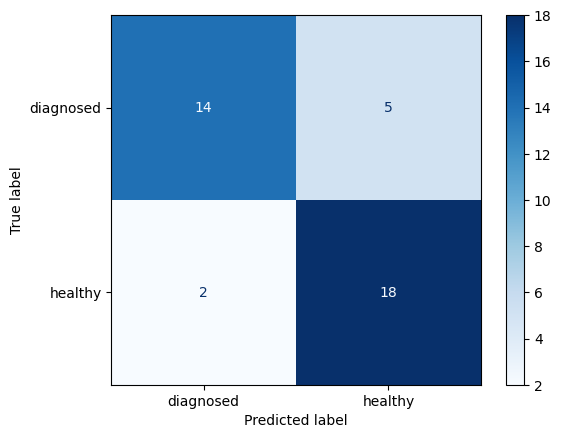

In [30]:

print(classification_report(y_test, y_pred_SMOTE))
cm=confusion_matrix(y_test, y_pred_SMOTE)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [31]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0]
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(adaboost_smote, param_grid, cv=KFold(n_splits=4, random_state=0, shuffle=True), scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.1s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.1s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.1s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.1s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.1s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   0.2s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   0.2s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   0.2s
[CV] END ................learning_rate=0.01, n_e

GridSearchCV(cv=KFold(n_splits=4, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=2)

In [32]:
# Print the best parameters and their corresponding accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy: %.2f%% " % (grid_search.best_score_*100.0))

# Evaluate on the test set
y_pred_SMOTEGr = grid_search.predict(X_test)
print("Accuracy of SMOTE data with Grid search: %.2f%%" % (grid_search.score(X_test, y_test) * 100.0))

Best parameters found: {'learning_rate': 0.1, 'n_estimators': 50}
Best cross-validation accuracy: 82.36% 
Accuracy of SMOTE data with Grid search: 87.18%


In [33]:
# Perform cross-validation
n_splits = 55
cv_scores = cross_val_score(grid_search, X_train_res, y_train_res, cv=n_splits, scoring='accuracy')

# Calculate the average of the cross-validation scores
average_accuracy = np.mean(cv_scores)
print(f"Average Accuracy over {n_splits}-fold cross-validation: {average_accuracy*100}")

Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.1s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.2s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.2s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.2s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.2s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   0.3s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   0.4s
[CV] END ................learning_rate=0.01, n_e

In [34]:
print(classification_report(y_test, y_pred_SMOTEGr))
cm=confusion_matrix(y_test, y_pred_SMOTEGr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

              precision    recall  f1-score   support

   diagnosed       0.79      1.00      0.88        19
     healthy       1.00      0.75      0.86        20

    accuracy                           0.87        39
   macro avg       0.90      0.88      0.87        39
weighted avg       0.90      0.87      0.87        39



# Undersampling

In [35]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(data, target)
print('Original dataset distribution %s' % Counter(y_res))
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3,random_state=random_state)

adaboost_underSampler = AdaBoostClassifier()
adaboost_underSampler.fit(X_train, y_train)
y_pred_underSampler= adaboost_underSampler.predict(X_test)
print("Accuracy of SMOTE data: %.2f%%" % (adaboost_underSampler.score(X_test, y_test) * 100.0))


Original dataset distribution Counter({'diagnosed': 50, 'healthy': 50})
Accuracy of SMOTE data: 66.67%


In [36]:
# Perform cross-validation
n_splits = 55
cv_scores = cross_val_score(adaboost_underSampler, X_res, y_res, cv=n_splits, scoring='accuracy')

# Calculate the average of the cross-validation scores
average_accuracy = np.mean(cv_scores)
print(f"Average Accuracy over {n_splits}-fold cross-validation: {average_accuracy*100}")

ValueError: n_splits=55 cannot be greater than the number of members in each class.

              precision    recall  f1-score   support

   diagnosed       0.77      0.59      0.67        17
     healthy       0.59      0.77      0.67        13

    accuracy                           0.67        30
   macro avg       0.68      0.68      0.67        30
weighted avg       0.69      0.67      0.67        30



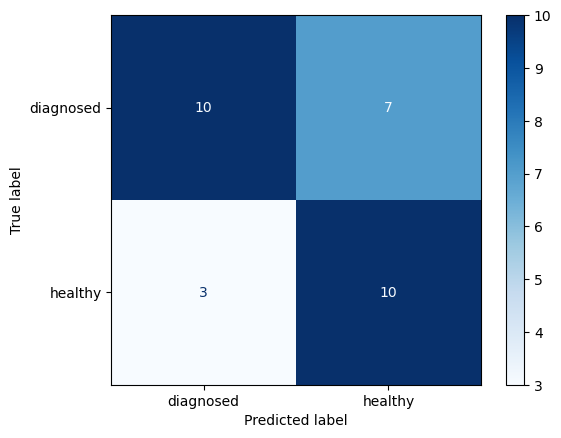

In [ ]:
print(classification_report(y_test, y_pred_underSampler))
cm=confusion_matrix(y_test, y_pred_underSampler)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0]
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(adaboost_underSampler, param_grid, cv=KFold(n_splits=4, random_state=0, shuffle=True), scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 20 candidates, totalling 80 fits


[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.2s
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.2s
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.2s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.3s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.3s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.3s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   0.4s
[CV] END ................lea

GridSearchCV(cv=KFold(n_splits=4, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=2)

In [ ]:

# Print the best parameters and their corresponding accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy: %.2f%% " % (grid_search.best_score_*100.0))

# Evaluate on the test set
y_pred_underSamplerGr = grid_search.predict(X_test)
print("Accuracy of under sampleing data with Grid search: %.2f%%" % (grid_search.score(X_test, y_test) * 100.0))


Best parameters found: {'learning_rate': 0.001, 'n_estimators': 50}
Best cross-validation accuracy: 81.62% 
Accuracy of under sampleing data with Grid search: 86.67%


In [ ]:
# Perform cross-validation
n_splits = 55
cv_scores = cross_val_score(grid_search, X_res, y_res, cv=n_splits, scoring='accuracy')

# Calculate the average of the cross-validation scores
average_accuracy = np.mean(cv_scores)
print(f"Average Accuracy over {n_splits}-fold cross-validation: {average_accuracy*100}")

              precision    recall  f1-score   support

   diagnosed       0.93      0.82      0.87        17
     healthy       0.80      0.92      0.86        13

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30



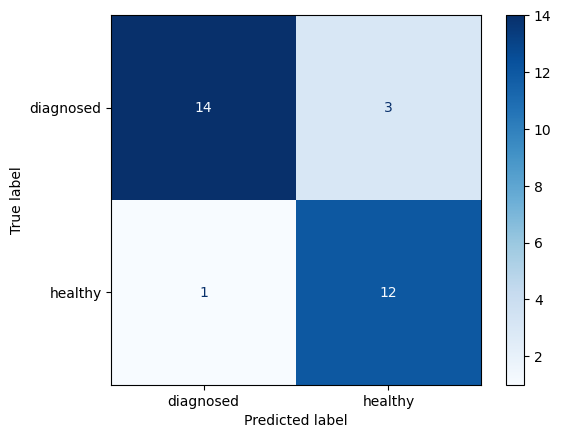

In [ ]:
print(classification_report(y_test, y_pred_underSamplerGr))
cm=confusion_matrix(y_test, y_pred_underSamplerGr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()